# [Computer Vision] Assignment #2

본 과제의 목적은 k-means clsutering 구현을 목표로 함.

* k-means clustering은 비지도학습의 한 종류로써, 사전에 정의된 클러스터 갯수 K와 초기값에 의해 데이터의 cluster 할당을 반복적으로 업데이트하는 알고리즘임.
* k-means clsutering 을 from scratch 로 구현하고, scikit-learn 의 결과와 비교함.
* 구현에 필요한 코드, 패키지, 파라미터, 함수 등을 skeleton code에 추가하여 사용 가능함.
* max_iterations 변화에 따른 clsutering 결과 양상 변화 확인
* tolerance 변화에 따른 clustering 결과 양상 변화 확인

## 1. K-means clustering from scratch (40 points)

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

class K_Means:
    # 클래스 생성자 구현 (2 points)
    # k: cluster 의 수
    # tolerance: 허용오차
    # (t-1 번째 clsuter centers 와 t 번째 clsuter centers 사이의 Euclidean 거리;
    # 해당 값 이하에서 iteration 중단)
    # max_iterations: 최대 iteration 횟수
    # 추가적으로 필요한 파라미터 자유롭게 설정
    def __init__(self, k=2, tolerance=0.001, max_iterations=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.labels = None
    # 거리 함수 구현 (3 points)
    # 두 벡터를 받아, Euclidean 거리를 리턴
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

    # fitting 함수 구현
    # E-step 과 M-step 을 반복하며 cluster centers를 찾는 과정
    def fit(self, data):

        # cluster centers 초기화 (5 points)
        # 각자의 방식으로 cluster centers 할당
        # (예. 특정 데이터 포인트, 랜덤 등)
        self.cluster_centers = np.array([data[i] for i in range(self.k)])

        # max_iterations 까지 반복
        for i in range(self.max_iterations):

            # E-step 구현 (5 points)
            # 모든 데이터에 대해 cluster centers 와의 거리를 비교하고 가장 가까운 center로 label 할당
            labels = []
            for point in data:
                distances = [self.euclidean_distance(point, center) for center in self.cluster_centers]
                cluster_label = np.argmin(distances)
                labels.append(cluster_label)
            self.labels = np.array(labels) # Cluster Label 업데이트

            # M-step 구현 (5 points)
            # t-1 번째 cluster centers를 저장해두고,
            # E-step에서 할당된 label을 이용하여 새롭게 cluster centers를 갱신
            prev_cluster_centers = np.copy(self.cluster_centers)
            for j in range(self.k):
                cluster_points = [data[x] for x in range(len(data)) if labels[x] == j]
                if len(cluster_points) > 0:
                    self.cluster_centers[j] = np.mean(cluster_points, axis=0)

            # 수렴 확인 (5 points)
            # 새롭게 갱신된 cluster centers에 대해,
            # 이전의 cluster centers와의 Euclidean 거리를 비교하여
            # tolerance 보다 작은 경우 알고리즘을 마침
            # 그렇지 않으면 max_iterations까지 알고리즘 수행
            if np.all(np.abs(self.cluster_centers - prev_cluster_centers) <= self.tolerance):
                break





# class K_Means:
#     # 클래스 생성자 구현 (2 points)
#     # k: cluster 의 수
#     # tolerance: 허용오차
#     # (t-1 번째 clsuter centers 와 t 번째 clsuter centers 사이의 Euclidean 거리;
#     # 해당 값 이하에서 iteration 중단)
#     # max_iterations: 최대 iteration 횟수
#     # 추가적으로 필요한 파라미터 자유롭게 설정
#     # def __init__(self, k=2, init="k-means++", tolerance = 0.001, max_iterations = 500, /*verbose = 0, randon_state=None, copy_x = True, algorithm = "lloyd"):


#     def __init__(self, k=3, init="k-means++", tolerance = 0.001, max_iterations = 500):
#         super().__init__(
#             n_clusters=k,
#             init=init,
#             tol = tolerance,
#             max_iter=max_iterations
#             data_list = []
#         )
#         self.gen_data(self.data_list)

#         # self.copy_x = copy_x
#         # self.algorithm = algorithm

    # def gen_data(list):
    #     duple = set()

    #     while len(duple) <= 50:
    #         temp = rd.randint(1, 100)
    #         duple.add(temp)

    #     i = 0
    #     rs = list(tuple())
    #     while len(list) <= 25:
    #         rs.append(duple[i], duple(i + 1))
    #         i += 1

#     # 거리 함수 구현 (3 points)
#     # 두 벡터를 받아, Euclidean 거리를 리턴
#     def euclidean_distance(self, point1, point2):
#         return np.sqrt(np.sum((point1 - point2) ** 2))


#     # fitting 함수 구현
#     # E-step 과 M-step 을 반복하며 cluster centers를 찾는 과정
#     def initialize_clusters(self, data):
#         initial_centers = np.array(rd.sample(data, self.k))
#         return initial_centers

#     def fit(self, data):
#         # cluster centers 초기화 (5 points)
#         # 각자의 방식으로 cluster centers 할당
#         # (예. 특정 데이터 포인트, 랜덤 등)
#         cluster_centers = self.initialize_clusters(data)
#         for iteration in range(self.max_iterations):
#             old_centers = cluster_centers
#             cluster_assignments = self.e_step(data, cluster_centers)
#             cluster_centers = self.m_step(data, cluster_assignments)
#             if self.has_converged(old_centers, cluster_centers):
#                 break


#         # # euclidian 을 통해 data 의 각 거리 값을 arr[]에 기록하는 동시에 중복되지 않도록 set 자료형 temp_set 에 추가.
#         # # temp_set 에 중복되지 않게 저장된 데이터의 각 개수를 arr에서 count 하여 찾고, 그 중의 최소값을 찾는다 (빈번한 값)
#         # # 최소값과 같은 euclidian 값을 가진 튜플 하나를 선정.
#         # arr = []
#         # temp_set = set()
#         # max = 0
#         # min = sys.maxsize
#         # len_d = len(data)

#         # for i in range(len_d):
#         #     for j in range(len_d):
#         #         arr[j].append(int(K_Means.euclidean_distance(data[i], data[j])))
#         #         temp_set.add(arr[j])
#         # for s in len(temp_set):
#         #     if arr.count(temp_set(s)) > max:
#         #         max = arr.count(temp_set(s))
#         # for i in range(len_d):
#         #     for j in range(len_d):
#         #       if arr[i].count == max and int(K_Means.euclidean_distance(data[i], data[j])) == arr[i]:
#         #           cc = data[i]
#         #           break

#         # # max_iterations 까지 반복
#         # for i in range(self.max_iterations):
#         #     for j in range(len_d):
#         #         if K_Means.euclidean_distance(cc, data[j]) < min:
#         #             new_cc = K_Means.euclidean_distance(cc, data[j])


#             # E-step 구현 (5 points)
#             # 모든 데이터에 대해 cluster centers 와의 거리를 비교하고 가장 가까운 center로 label 할당
#     def e_step(self, data, cluster_centers):
#         cluster_assignments = []
#         for point in data:
#             distances = [K_Means.euclidean_distance(point, center) for center in cluster_centers]
#             closest_cluster = np.argmin(distances)
#             cluster_assignments.append(closest_cluster)
#         return cluster_assignments

#             # M-step 구현 (5 points)
#             # t-1 번째 cluster centers를 저장해두고,
#             # E-step에서 할당된 label을 이용하여 새롭게 cluster centers를 갱신
#     def m_step(self, data, cluster_assignments):
#         new_cluster_centers = []
#         for cluster_id in range(self.k):
#             cluster_points = [data[i] for i in range(len(data)) if cluster_assignments[i] == cluster_id]
#             if len(cluster_points) == 0:
#                 # Handle the case where no points are assigned to this cluster.
#                 new_center = data[random.randint(0, len(data) - 1)]
#             else:
#                 new_center = np.mean(cluster_points, axis=0)
#             new_cluster_centers.append(new_center)
#         return new_cluster_centers


#             # 수렴 확인 (5 points)
#             # 새롭게 갱신된 cluster centers에 대해,
#             # 이전의 cluster centers와의 Euclidean 거리를 비교하여
#             # tolerance 보다 작은 경우 알고리즘을 마침
#             # 그렇지 않으면 max_iterations까지 알고리즘 수행
#     def has_converged(self, old_centers, new_centers):
#         distances = [K_Means.euclidean_distance(old_centers[i], new_centers[i]) for i in range(self.k)]
#         return all(dist <= self.tolerance for dist in distances)

#                 # if K_Means.euclidean_distance(cc, new_cc) < self.tol:
#                 #     print(f"previous cluster center = {cc} <--{K_Means.euclidean_distance(cc, new_cc)}--> new cluster center = {new_cc} < tolerance = {self.tol}")
#                 # else:
#                 #     print(f"K_Means.euclidean_distance(cc, new_cc) = {K_Means.euclidean_distance(cc, new_cc)} > tol = {tol}")


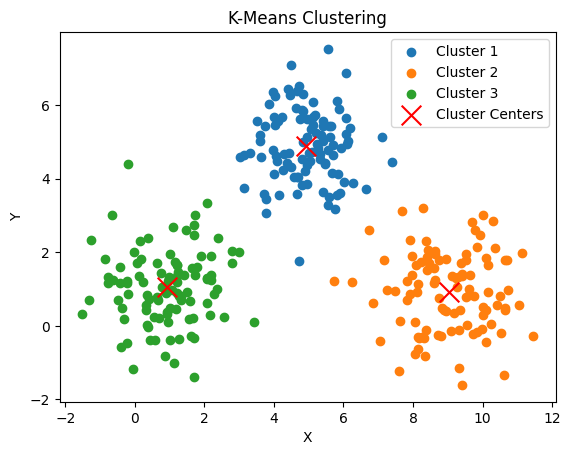

In [57]:
# Define the K_Means class as previously mentioned.
# ... (Include the K_Means class implementation here) ...
# import K_Means
# cluster 수 (k) 및 cluster centers 초기화 (5 points)
k = 3
center_1 = (1, 1)
center_2 = (9, 1)
center_3 = (5, 5)

k_means = K_Means(k)

# 데이터 생성 (랜덤 데이터 생성)
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100, 2) + center_2
cluster_3 = np.random.randn(100, 2) + center_3

# 생성한 데이터를 모두 합쳐서 하나의 형태로 변형 (1 point)
data = np.vstack((cluster_1, cluster_2, cluster_3))

# 구현한 K-Means 알고리즘 적용
k_means.fit(data)

# clustering 결과 시각화 (5 points)
labels = k_means.labels
# print(f"labels = {labels}")
cluster_centers = k_means.cluster_centers

for i in range(k):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('K-Means Clustering')
plt.show()


## 2. K-means clustering with scikit-learn (10 points)

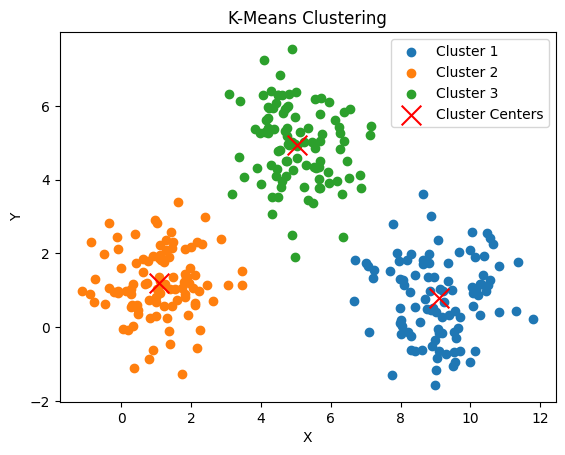

In [59]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


# scikit-learn을 통한 확인 (5 points)
# data는 이전에 설정한 데이터와 동일한 데이터 활용
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 링크 참조하여 작성

# 데이터 생성 (랜덤 데이터 생성)
cluster_1 = np.random.randn(100, 2) + center_1
cluster_2 = np.random.randn(100, 2) + center_2
cluster_3 = np.random.randn(100, 2) + center_3

# 생성한 데이터를 모두 합쳐서 하나의 형태로 변형 (1 point)
data = np.vstack((cluster_1, cluster_2, cluster_3))

kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data)

kmeans.labels_
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_


# clustering 결과 시각화 (5 points)
labels = kmeans.labels_
# print(f"labels = {labels}")
cluster_centers = kmeans.cluster_centers_

for i in range(k):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('K-Means Clustering')
plt.show()